In [1]:
from plot import DataVisualizer

In [3]:
dv = DataVisualizer("smallerlr_thindeep")

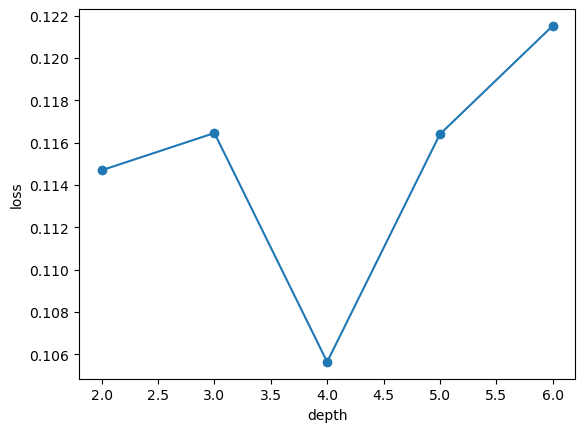

In [4]:
dv.visualize_data("depth", {"lr": 0.0003})